# Exercise 8 Reinforcement Learning I 
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Good vs. bad Döner

In [2]:
n_states = 50
good_doener_val = 1000
bad_doener_val = 100

rewards = np.repeat(-10, n_states + 2)
rewards[0] = 0
rewards[1] = good_doener_val
rewards[-2] = bad_doener_val
rewards[-1] = 0
rewards

array([   0, 1000,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  100,    0])

In [3]:
# For each state, two actions are possible.
# First q values note down-movement.
q_val = np.random.random((n_states + 2, 2))
q_val[0] = np.array([0, 0])
q_val[-1] = np.array([0, 0])

q_val

array([[0.00000000e+00, 0.00000000e+00],
       [8.24616332e-01, 5.49956056e-01],
       [8.55717999e-01, 5.45804379e-01],
       [9.52307773e-01, 3.27777498e-01],
       [8.91709802e-01, 6.64068187e-01],
       [5.05404256e-01, 4.13108576e-01],
       [4.16431537e-01, 8.46612277e-01],
       [6.08454093e-01, 1.87770998e-01],
       [4.17651375e-01, 6.56061774e-01],
       [8.38181398e-01, 3.82322228e-02],
       [5.58523651e-01, 4.43000386e-01],
       [2.72661063e-01, 4.48784300e-01],
       [7.20437096e-01, 3.37731223e-01],
       [3.03471947e-02, 3.26253133e-01],
       [4.07266338e-01, 7.78099933e-01],
       [7.56259025e-01, 1.81066797e-01],
       [6.16758979e-01, 7.89150259e-01],
       [1.42385573e-01, 3.12644665e-01],
       [7.88552752e-01, 3.61409288e-01],
       [8.91071638e-01, 3.22485880e-01],
       [5.97440324e-02, 6.39533801e-01],
       [2.24857921e-01, 3.07408776e-01],
       [4.77410704e-03, 6.87623675e-01],
       [2.08306389e-01, 8.58620658e-01],
       [1.893073

In [4]:
def choose_action(q, state, eps=0.1):
    """Return -1 for down, +1 for up."""
    action = None
   
    if np.random.random() < 1-eps:
        if q[state][0] > q[state][1]:
            action = -1
        else:
            action = 1
    else:
        action = np.random.choice([1, -1])
    return action

In [5]:
# SARSA algorithm.
episodes = 500
eta = 0.1
gamma = 1
trials_taken = []

for _ in range(episodes):
    state = np.random.randint(n_states)
#     state = 0
#     state = 50
    action = choose_action(q_val, state)
    i = 0
#     reward = 0
    while(state + action >= 0 and state + action < q_val.shape[0] -1):
        
        new_state = state + action
        reward = rewards[new_state] #rewards[state]

        new_action = choose_action(q_val, new_state)

        # Q-val-update
        action_idx = (action+1)//2
        new_action_idx = (new_action+1)//2
        
#         print(f"{state} {action_idx}")
#         print("old:", q_val[state][action_idx])
        q_val[state][action_idx] = q_val[state][action_idx] + eta * (reward + gamma * q_val[new_state][new_action_idx] - q_val[state][action_idx])
#         print("new: ", q_val[state][action_idx])
        
        state = new_state
        action = new_action
        
        i+=1
    
#     print(reward)
#     print("state", state)
#     print("Top", q_val[1])
#     print("Bot", q_val[-2])
    
#     print("STOPPED", state + action)

#     q_val[0][0] = 0
#     q_val[0][1] = 0
#     q_val[-1][0] = 0
#     q_val[-1][1] = 0
    
    trials_taken.append(i)

In [6]:
q_val

array([[ 0.00000000e+00,  3.62149043e+05],
       [ 3.22825964e+05,  3.62263066e+05],
       [ 3.62441712e+05,  3.57977479e+05],
       [ 3.60006577e+05,  3.55039549e+05],
       [ 3.57512907e+05,  3.43386581e+05],
       [ 3.50488534e+05,  2.78409602e+05],
       [ 3.27760047e+05,  1.31619202e+05],
       [ 3.12075852e+05,  6.58470492e+04],
       [ 2.75128065e+05,  1.02652515e+05],
       [ 2.71205424e+05,  7.64478921e+04],
       [ 2.59904653e+05,  5.31385728e+04],
       [ 2.31334443e+05,  6.98214583e+04],
       [ 2.06460984e+05,  3.02075723e+04],
       [ 1.85363000e+05,  3.64237411e+04],
       [ 1.74768752e+05,  8.20539038e+03],
       [ 1.44729152e+05, -5.34327132e+01],
       [ 1.14038227e+05,  4.03088072e+03],
       [ 7.62138286e+04,  8.88726349e+02],
       [ 3.96495518e+04,  1.01683243e+03],
       [ 1.97266266e+04,  2.61669688e+02],
       [ 8.60873722e+03, -2.89299595e+00],
       [ 3.10321810e+03, -1.10250715e+02],
       [ 6.73873856e+02, -1.17565601e+02],
       [-3.

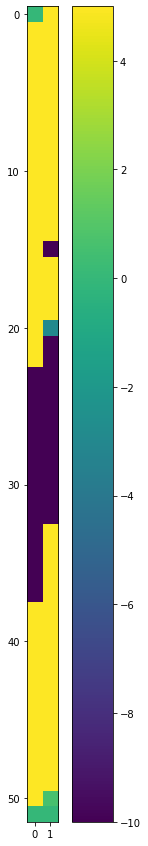

In [7]:
plt.figure(figsize = (5, 15))
plt.imshow(q_val, vmin = -10, vmax = 5)
plt.colorbar()

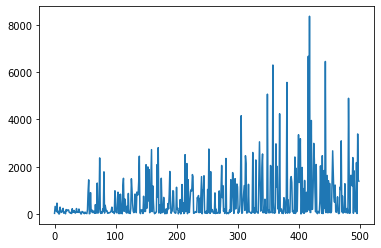

In [8]:
plt.plot(trials_taken)